#### Flight Price Prediction

##### Problem Statement:
- Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

1. Size of training set: 10683 records

#### FEATURES:
1. Airline: The name of the airline.

2. Date_of_Journey: The date of the journey

3. Source: The source from which the service begins.

4. Destination: The destination where the service ends.

5. Route: The route taken by the flight to reach the destination.

6. Dep_Time: The time when the journey starts from the source.

7. Arrival_Time: Time of arrival at the destination.

8. Duration: Total duration of the flight.

9. Total_Stops: Total stops between the source and destination.

10. Additional_Info: Additional information about the flight

11. Price: The price of the ticket

# Import Libraries and Datasets

In [105]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warning 
import warnings
warnings.filterwarnings("ignore")

In [106]:
#read the excel file 
flight = pd.read_excel("Test_Set.xlsx")

In [107]:
# check the first five records
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [108]:
# check the shape of the dataframe
flight.shape

(2671, 10)

### There are 10683 records and 11 columns

# Identify the problem : Regression

In [109]:
# check datatype
flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [110]:
#inspect the unique values
for x in flight.columns:
    print(flight[x].unique())

['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
['6/06/2019' '12/05/2019' '21/05/2019' '24/06/2019' '12/06/2019'
 '12/03/2019' '1/05/2019' '15/03/2019' '18/05/2019' '21/03/2019'
 '15/06/2019' '15/05/2019' '3/06/2019' '06/03/2019' '24/03/2019'
 '6/03/2019' '9/05/2019' '18/03/2019' '6/04/2019' '1/06/2019' '3/03/2019'
 '27/03/2019' '9/06/2019' '3/05/2019' '1/04/2019' '18/06/2019'
 '15/04/2019' '6/05/2019' '9/03/2019' '3/04/2019' '27/06/2019'
 '21/06/2019' '21/04/2019' '18/04/2019' '9/04/2019' '24/05/2019'
 '01/03/2019' '09/03/2019' '27/05/2019' '03/03/2019' '27/04/2019'
 '1/03/2019' '24/04/2019' '12/04/2019']
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
['DEL → BOM → COK' 'CCU → MAA → BLR' 'BLR → DEL' 'BLR → TRV → DEL'
 'CCU → HYD → BLR' 'CCU → BLR' 'CCU → BOM → BLR' 'DEL → MAA → BOM → C

### Observation:

- The target variable is numeric and hence the regression models will be used for prediciton of price

# Exploratory Data Analysis and Data Cleaning

### Univariate analysis

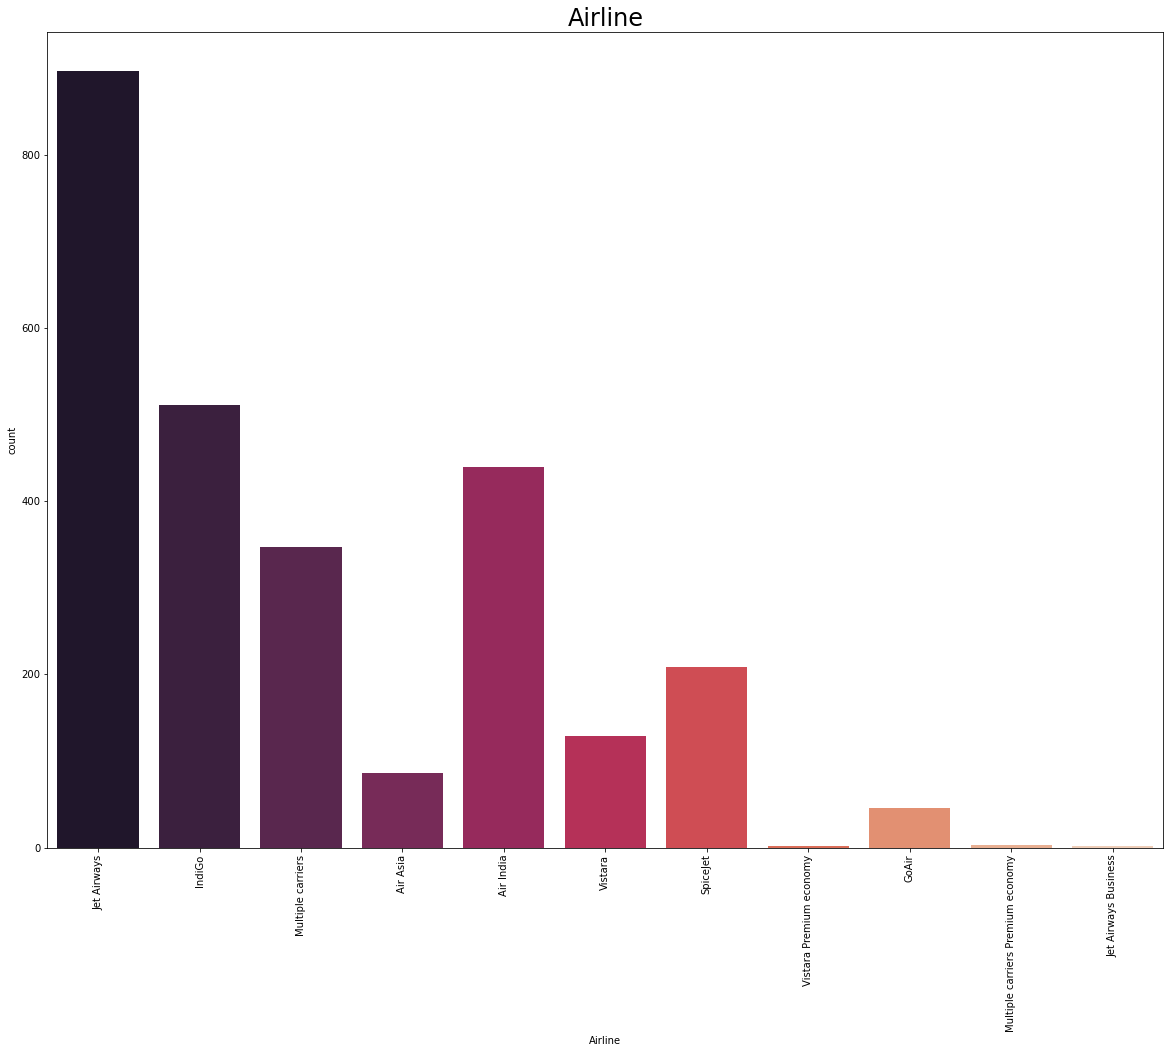

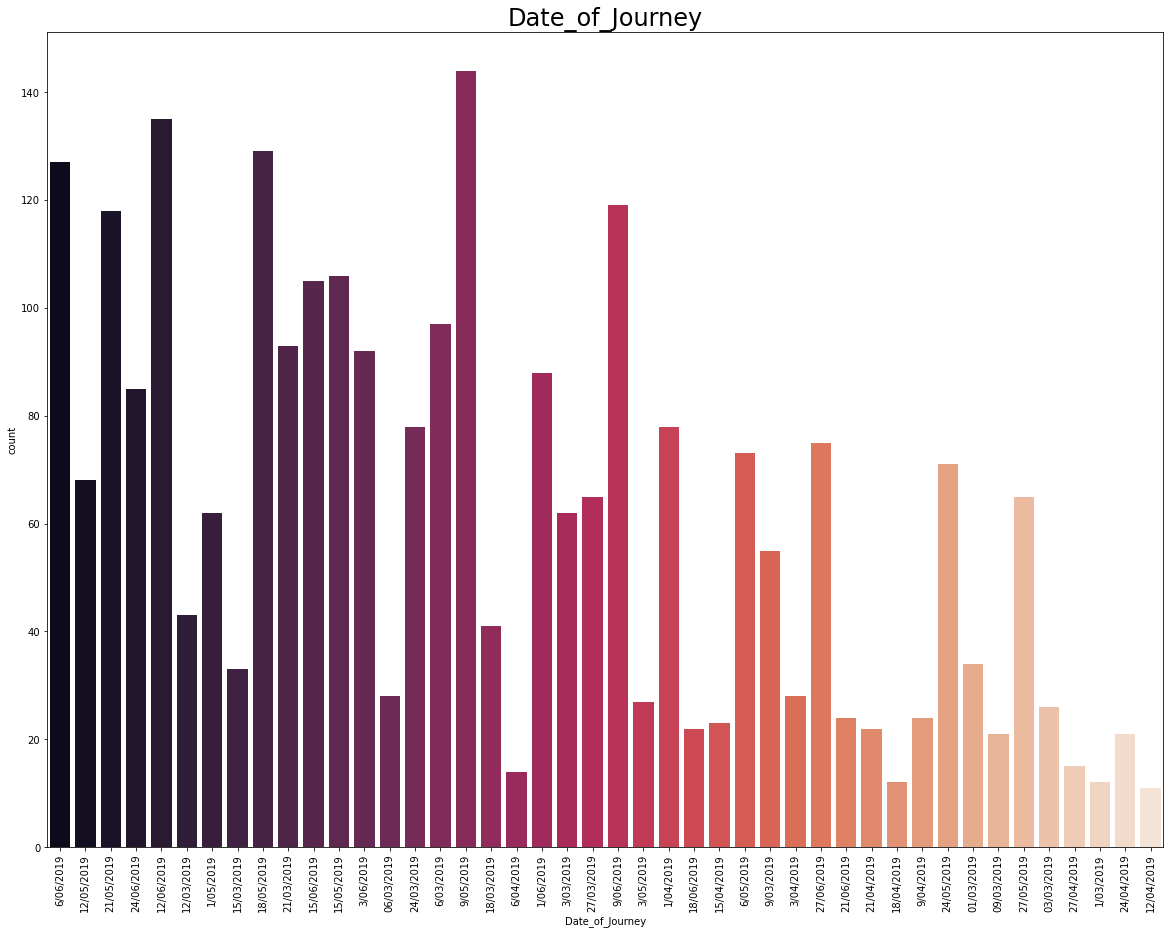

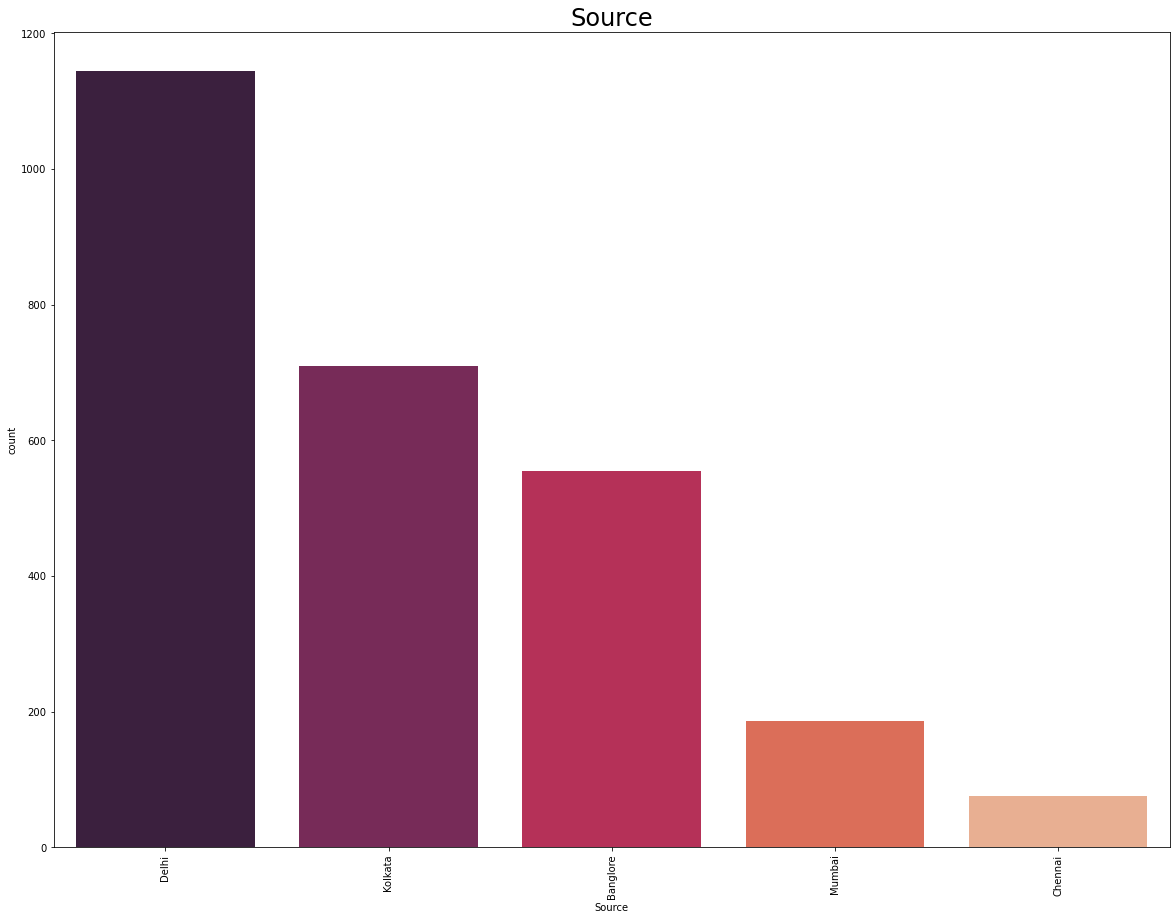

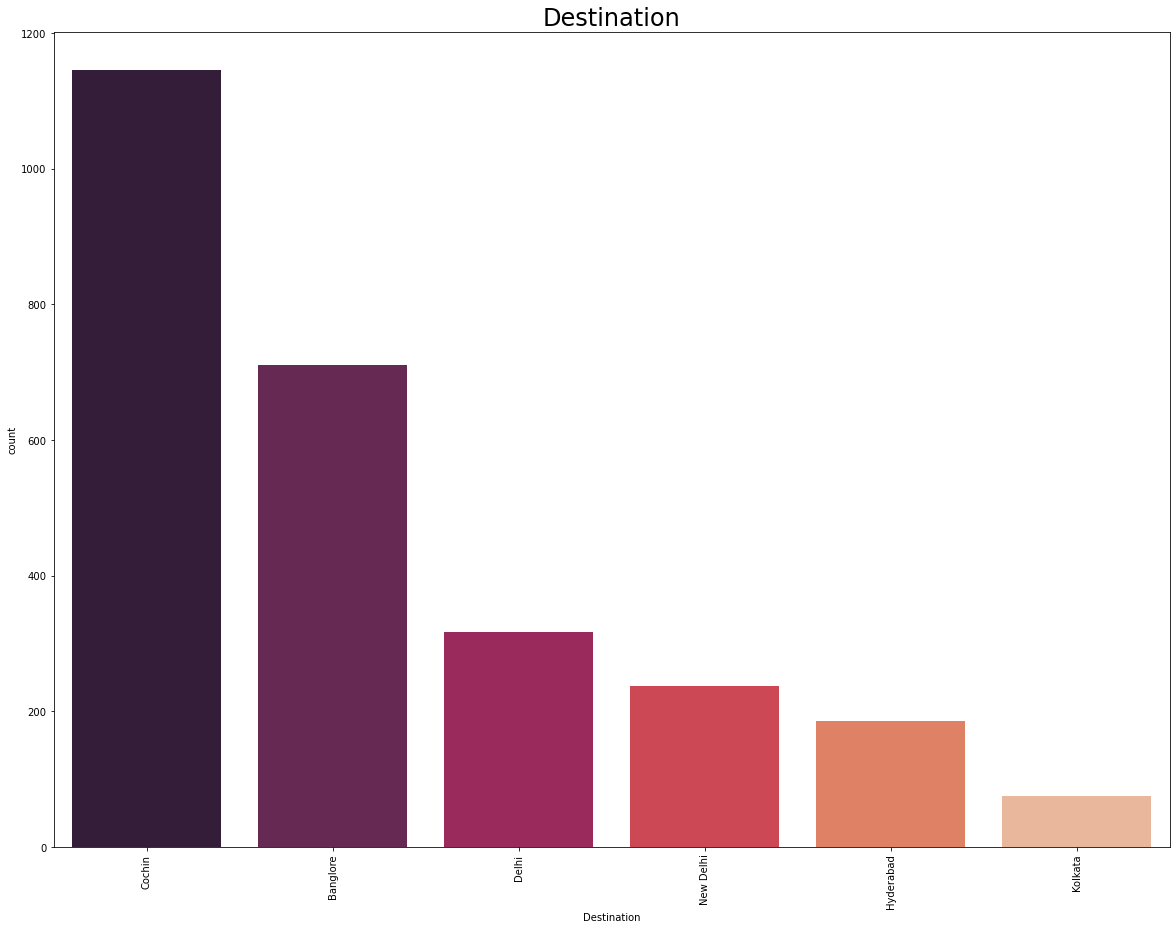

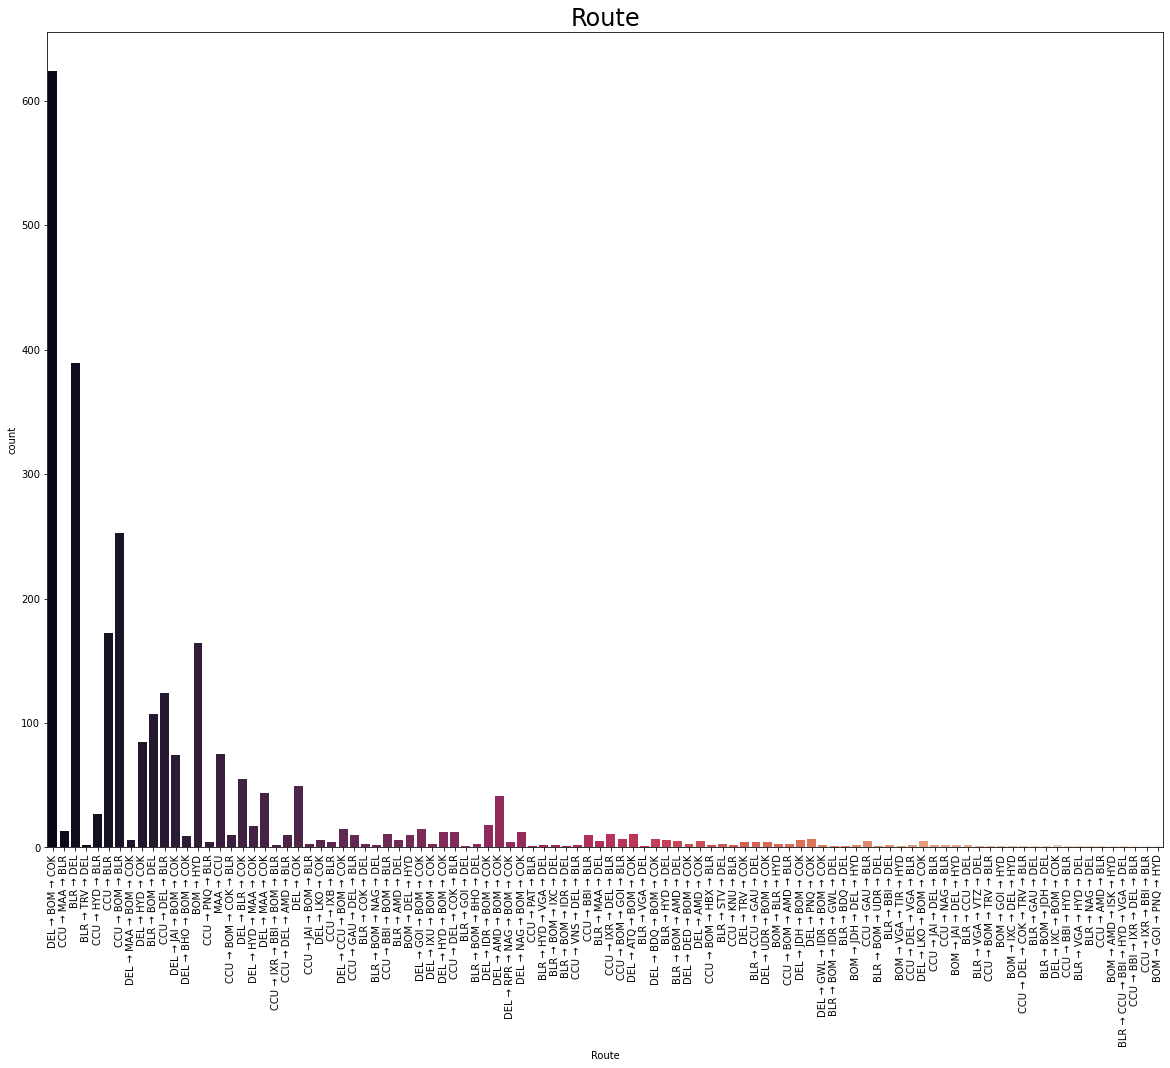

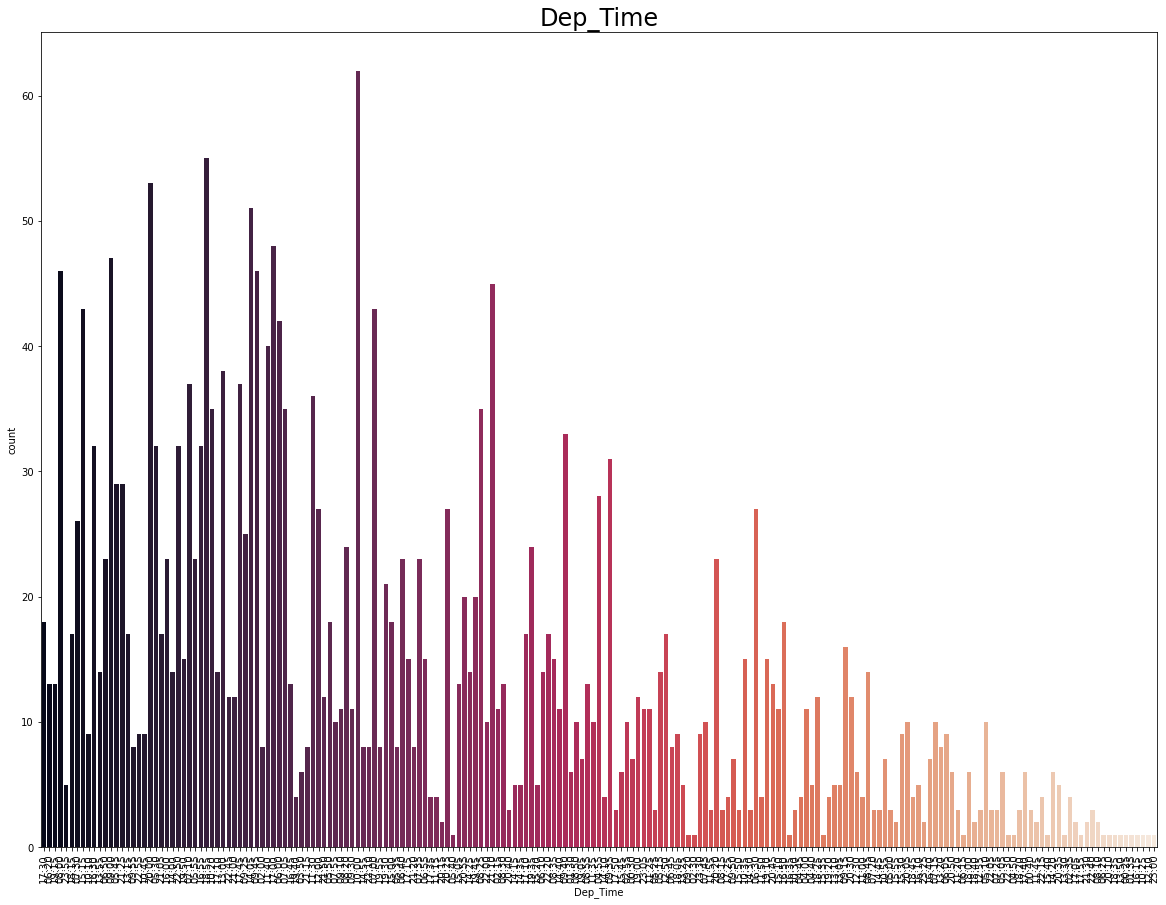

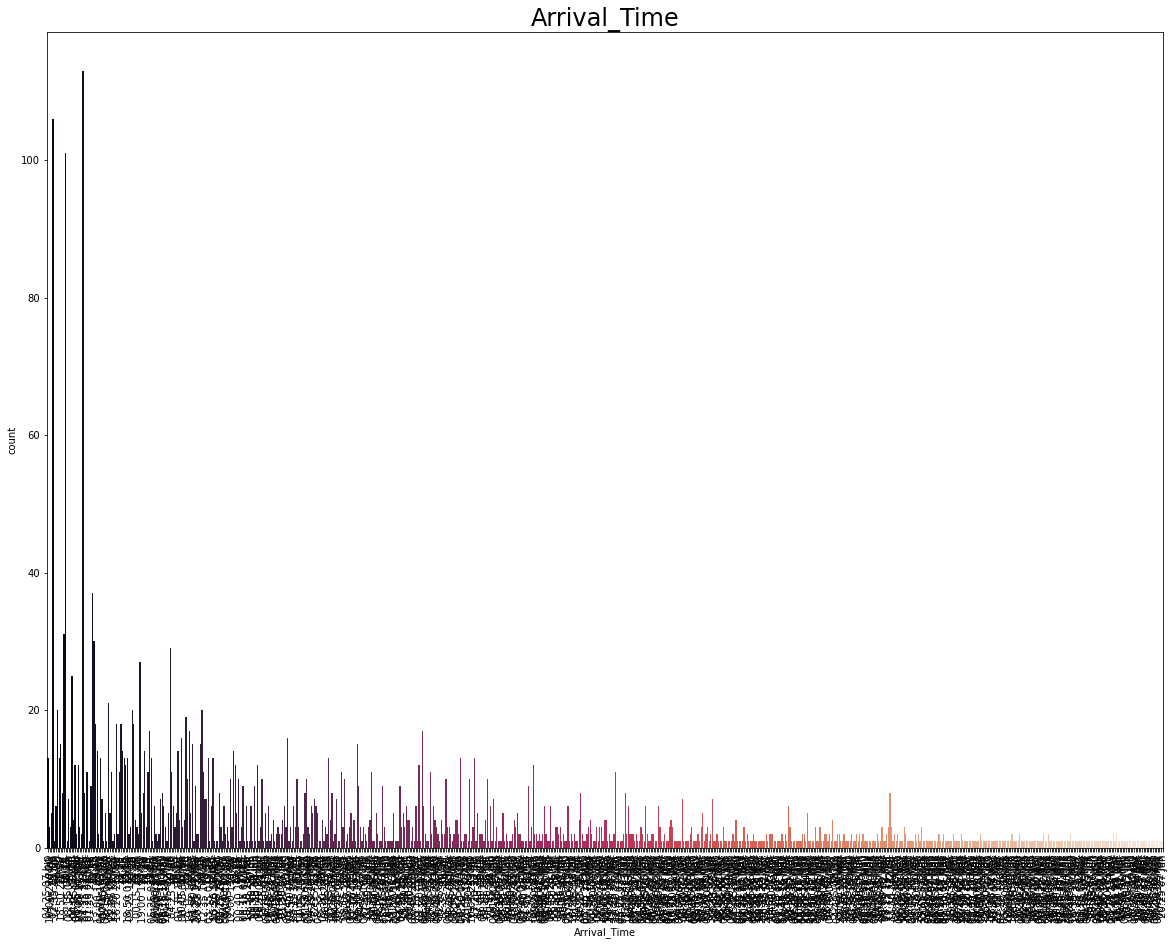

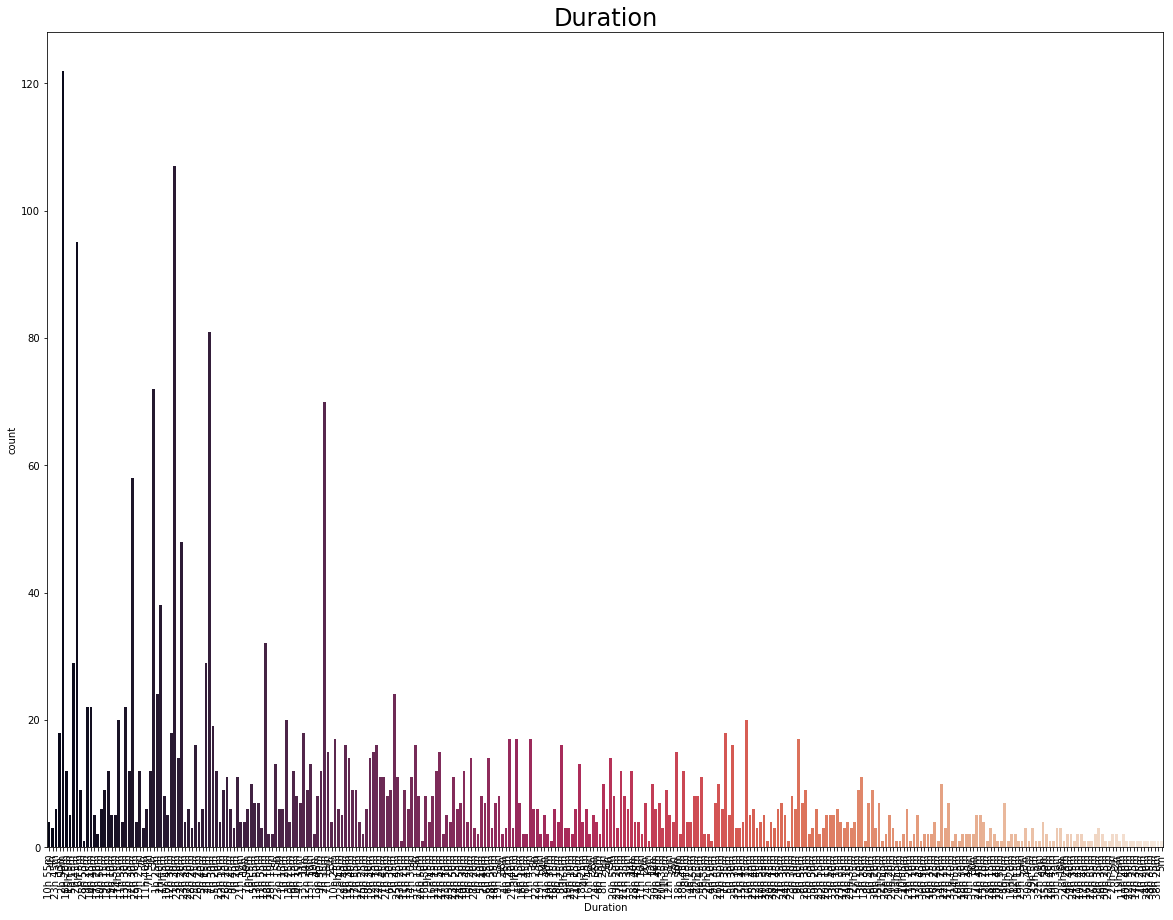

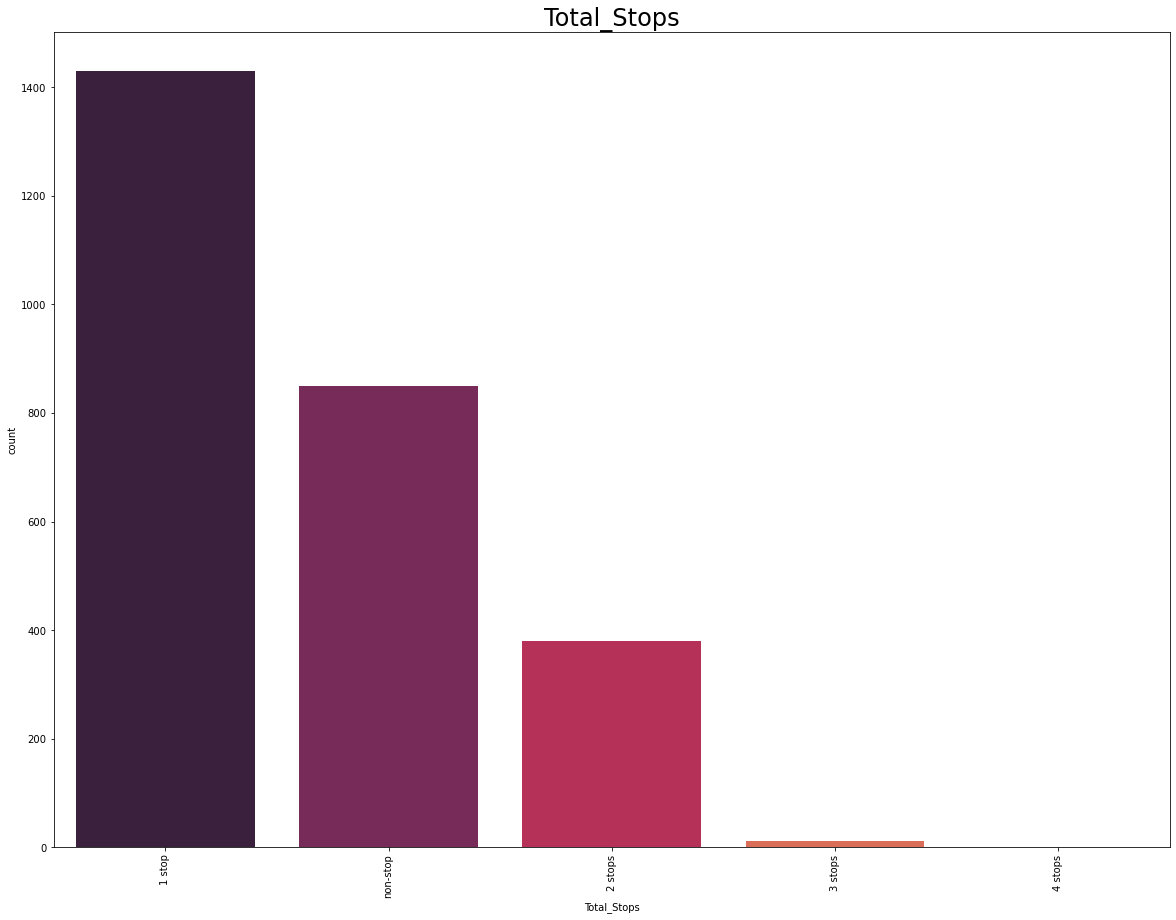

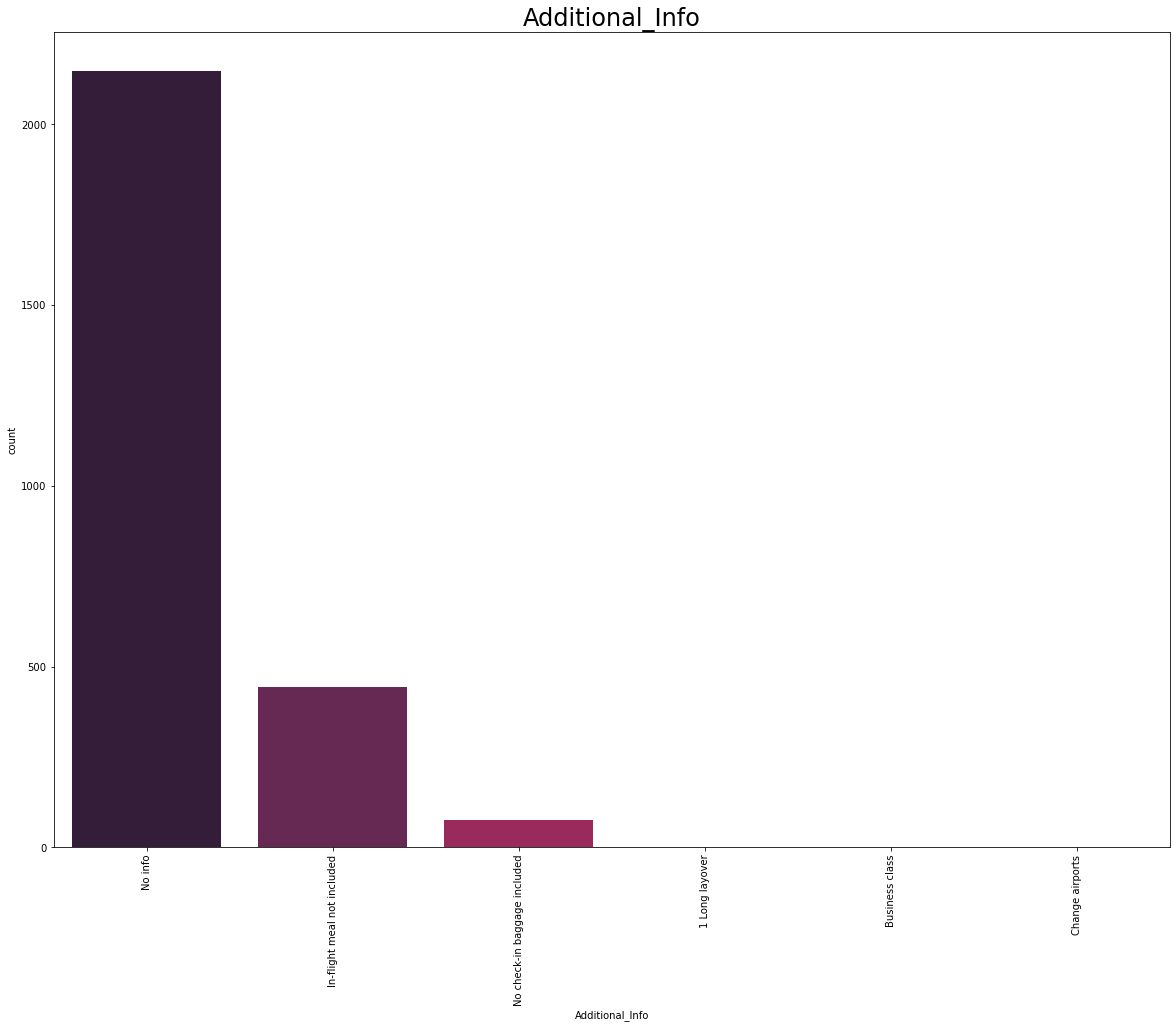

In [111]:
for i in flight.columns:
    fig_size = (20,15)
    fig, ax = plt.subplots(figsize = fig_size)
    sns.countplot(data=flight, x=i, palette="rocket")
    plt.xticks(rotation=90)
    plt.title(i, fontsize = 24)

In [112]:
for i in flight.columns:
    print(flight[i].value_counts())

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
24/03/2019     78
1/04/2019      78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28

### Observtions:

1. Airline : Jetairways have the highest count of 3849 record
2. Date_of_Journey: customers have travelled a lot in the dates 18/05/2019, 6/06/209,21/05/2019, 9/06/2019, 12/05/2019, 9/06/2019,9/05/2019.
3. Source: Most of the customers have travelled from delhi
4. Destination: Most of the customers have travelled to cochin
5. Route: DEL → BOM → COK delhi bombay cochin is the most travelled route
6. Dep_Time: the hightes frequestly travelled deperature time is 18:55
7. Arrival_Time: the hightes frequestly travelled arrival time is 19:00
8. Duration: The hightes frequestly travelled duration 2h 50m 
9. Total_Stops: More than 5000 records have 1 stops
10. Additional_Info : Most of the records of additional information are not available 

In [113]:
#check column names 
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

#### Replace ? with null

In [114]:
flight = flight.replace("?", np.nan)

In [115]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

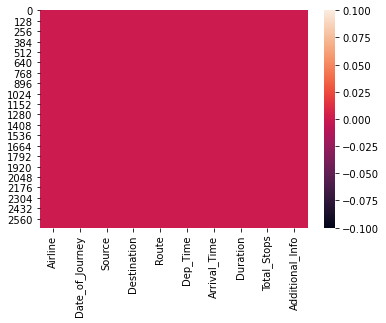

In [116]:
sns.heatmap(flight.isnull())

- only 2 null values and hence we drop the column

In [117]:
flight.dropna(subset=["Route", "Total_Stops"], inplace=True)

In [118]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

- No null values

### Handlne time and date records

In [119]:
flight["Date_of_Journey"]  = pd.to_datetime(flight["Date_of_Journey"])

In [120]:
flight["Date_of_Journey"] .dtypes

dtype('<M8[ns]')

In [121]:

flight["Date_of_Journey"]

0      2019-06-06
1      2019-12-05
2      2019-05-21
3      2019-05-21
4      2019-06-24
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 2671, dtype: datetime64[ns]

##### converted to date

In [122]:
flight.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [123]:
flight["Dep_Time"] = pd.to_timedelta(flight["Dep_Time"]+":00")

In [124]:
flight.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time           timedelta64[ns]
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
dtype: object

In [125]:
Arrival_Time = flight[["Arrival_Time"]].copy()

In [126]:
flight["Arrival_Time"] = flight["Arrival_Time"].str.split(" ", n=1, expand=True)

In [127]:
flight.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30:00,04:25,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20:00,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15:00,19:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55:00,02:45,2h 50m,non-stop,No info


In [128]:
flight["Arrival_Time"] = pd.to_timedelta(flight["Arrival_Time"]+":00")

In [129]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30:00,04:25:00,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20:00,10:20:00,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15:00,19:00:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00:00,21:00:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55:00,02:45:00,2h 50m,non-stop,No info


In [130]:
#flight["Duration"].replace(to_replace=r'h', value="", regex=True, inplace=True)

In [131]:
#flight["Duration"].replace(to_replace=r'm', value="", regex=True, inplace=True)

In [132]:
#flight["Duration"]

In [133]:
flight["Duration"] = pd.to_timedelta(flight["Duration"])

In [134]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30:00,04:25:00,10:55:00,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20:00,10:20:00,04:00:00,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15:00,19:00:00,23:45:00,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00:00,21:00:00,13:00:00,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55:00,02:45:00,02:50:00,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30:00,20:25:00,23:55:00,1 stop,No info
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20:00,16:55:00,02:35:00,non-stop,No info
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50:00,04:25:00,06:35:00,1 stop,No info
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00:00,19:15:00,15:15:00,1 stop,No info


In [135]:
flight["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [136]:
flight.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time           timedelta64[ns]
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                 object
Additional_Info             object
dtype: object

##### the date and time records are handled 

### Handling categorical variables

In [137]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [138]:
obj = []
for x in flight.columns:
    if flight[x].dtypes == "object":
        obj.append(x)

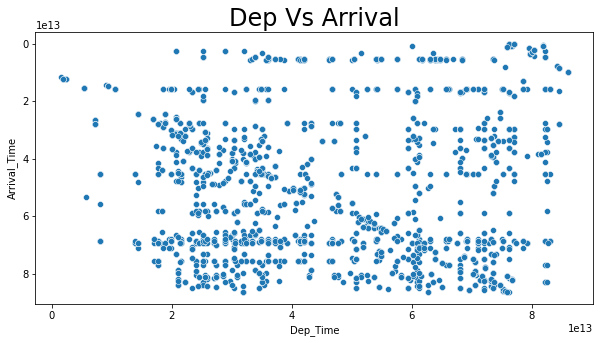

In [139]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Dep Vs Arrival", fontsize=24)
sns.scatterplot(x="Dep_Time", y= "Arrival_Time", data=flight)   

### Observation:
- No relationship between deptime and arrival time

In [140]:
flight.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time           timedelta64[ns]
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                 object
Additional_Info             object
dtype: object

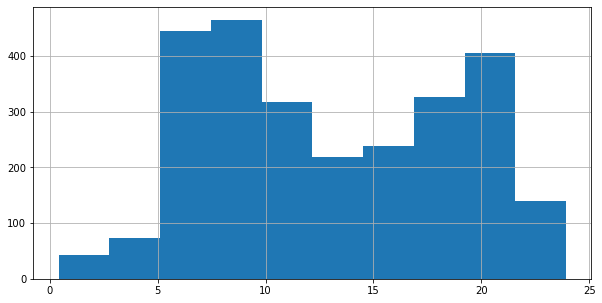

In [141]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
flight["Dep_Time"].dt.seconds.apply(lambda x:x/3600).hist()

- The distribution of the dep time is not normalize

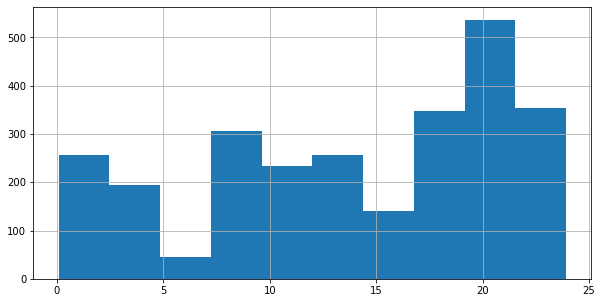

In [142]:
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
flight["Arrival_Time"].dt.seconds.apply(lambda x:x/3600).hist()

- The distribution is not normalized

In [143]:
flight["Date_of_Journey"].value_counts()

2019-09-05    144
2019-12-06    135
2019-05-18    129
2019-06-06    127
2019-06-03    125
2019-09-06    119
2019-05-21    118
2019-05-15    106
2019-06-15    105
2019-03-21     93
2019-03-06     92
2019-03-03     88
2019-01-06     88
2019-06-24     85
2019-03-24     78
2019-01-04     78
2019-09-03     76
2019-06-27     75
2019-06-05     73
2019-05-24     71
2019-12-05     68
2019-03-27     65
2019-05-27     65
2019-01-05     62
2019-01-03     46
2019-12-03     43
2019-03-18     41
2019-03-15     33
2019-03-04     28
2019-03-05     27
2019-09-04     24
2019-06-21     24
2019-04-15     23
2019-04-21     22
2019-06-18     22
2019-04-24     21
2019-04-27     15
2019-06-04     14
2019-04-18     12
2019-12-04     11
Name: Date_of_Journey, dtype: int64

In [144]:
df = flight.set_index("Date_of_Journey")

In [145]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
Date_of_Journey,,,,,,,,,
2019-06-06,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30:00,04:25:00,10:55:00,1 stop,No info
2019-12-05,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20:00,10:20:00,04:00:00,1 stop,No info
2019-05-21,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15:00,19:00:00,23:45:00,1 stop,In-flight meal not included
2019-05-21,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00:00,21:00:00,13:00:00,1 stop,No info
2019-06-24,Air Asia,Banglore,Delhi,BLR → DEL,23:55:00,02:45:00,02:50:00,non-stop,No info
...,...,...,...,...,...,...,...,...,...
2019-06-06,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30:00,20:25:00,23:55:00,1 stop,No info
2019-03-27,IndiGo,Kolkata,Banglore,CCU → BLR,14:20:00,16:55:00,02:35:00,non-stop,No info
2019-06-03,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50:00,04:25:00,06:35:00,1 stop,No info


## Label Encoding 

In [146]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in obj:
    flight[x]=le.fit_transform(flight[x])

#### Convert date time to ordinal

In [147]:
#converting date to ordinal type for prediction
import datetime as dt
flight["Date_of_Journey"] = flight["Date_of_Journey"].map(dt.datetime.toordinal)


In [148]:
flight.dtypes

Airline                      int32
Date_of_Journey              int64
Source                       int32
Destination                  int32
Route                        int32
Dep_Time           timedelta64[ns]
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                  int32
Additional_Info              int32
dtype: object

In [149]:
flight["Dep_Time"] 

0      17:30:00
1      06:20:00
2      19:15:00
3      08:00:00
4      23:55:00
         ...   
2666   20:30:00
2667   14:20:00
2668   21:50:00
2669   04:00:00
2670   04:55:00
Name: Dep_Time, Length: 2671, dtype: timedelta64[ns]

In [150]:
flight["Dep_Time"]=  pd.to_numeric(flight["Dep_Time"], downcast='integer')

In [151]:
flight.dtypes

Airline                      int32
Date_of_Journey              int64
Source                       int32
Destination                  int32
Route                        int32
Dep_Time                     int64
Arrival_Time       timedelta64[ns]
Duration           timedelta64[ns]
Total_Stops                  int32
Additional_Info              int32
dtype: object

In [152]:
flight["Arrival_Time"]=  pd.to_numeric(flight["Arrival_Time"], downcast='integer')
flight["Duration"]=  pd.to_numeric(flight["Duration"], downcast='integer')

In [153]:
flight.dtypes

Airline            int32
Date_of_Journey    int64
Source             int32
Destination        int32
Route              int32
Dep_Time           int64
Arrival_Time       int64
Duration           int64
Total_Stops        int32
Additional_Info    int32
dtype: object

In [154]:
flight.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2.671000e+03,2.671000e+03,2.671000e+03,2671.000000,2671.000000
mean,3.972669,737210.076750,1.961438,1.432797,54.356421,4.686615e+13,5.038012e+13,3.838450e+13,1.422688,4.634594
std,2.295657,90.898159,1.184328,1.467971,27.128993,2.046452e+13,2.522804e+13,3.013122e+13,1.795728,0.760781
min,0.000000,737062.000000,0.000000,0.000000,0.000000,1.500000e+12,3.000000e+11,3.000000e+11,0.000000,0.000000
25%,3.000000,737139.000000,2.000000,0.000000,33.000000,2.880000e+13,3.150000e+13,1.050000e+13,0.000000,5.000000
50%,4.000000,737203.000000,2.000000,1.000000,51.000000,4.320000e+13,5.550000e+13,3.120000e+13,0.000000,5.000000
75%,6.000000,737237.000000,3.000000,2.000000,76.000000,6.570000e+13,7.110000e+13,5.490000e+13,4.000000,5.000000
max,10.000000,737399.000000,4.000000,5.000000,99.000000,8.610000e+13,8.610000e+13,1.464000e+14,4.000000,5.000000


### Observation:
 -  some columns have huge difference between mean and std but, considering them to be categorical it can be ignored
 - Min -max range has big difference - apply scalling

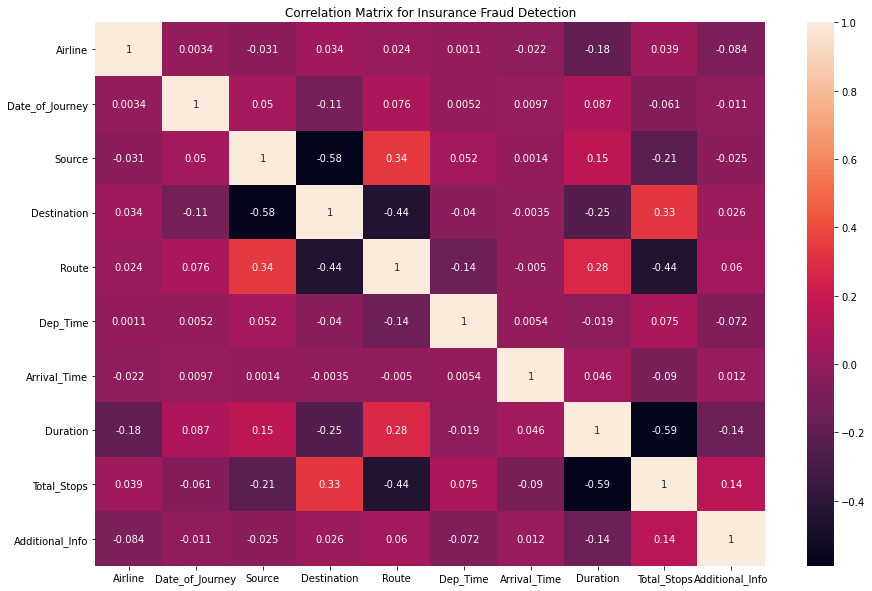

In [155]:
#correlation matrix to find correlation amoung the columns
correlation = flight.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix for Insurance Fraud Detection")
plt.show()

### Correlation:
- All independent variables are either positively or negatively correlated with the target variable

## Check for null values

In [157]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

- All the columns are categorical no skewness

## Check for outliers and removal

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

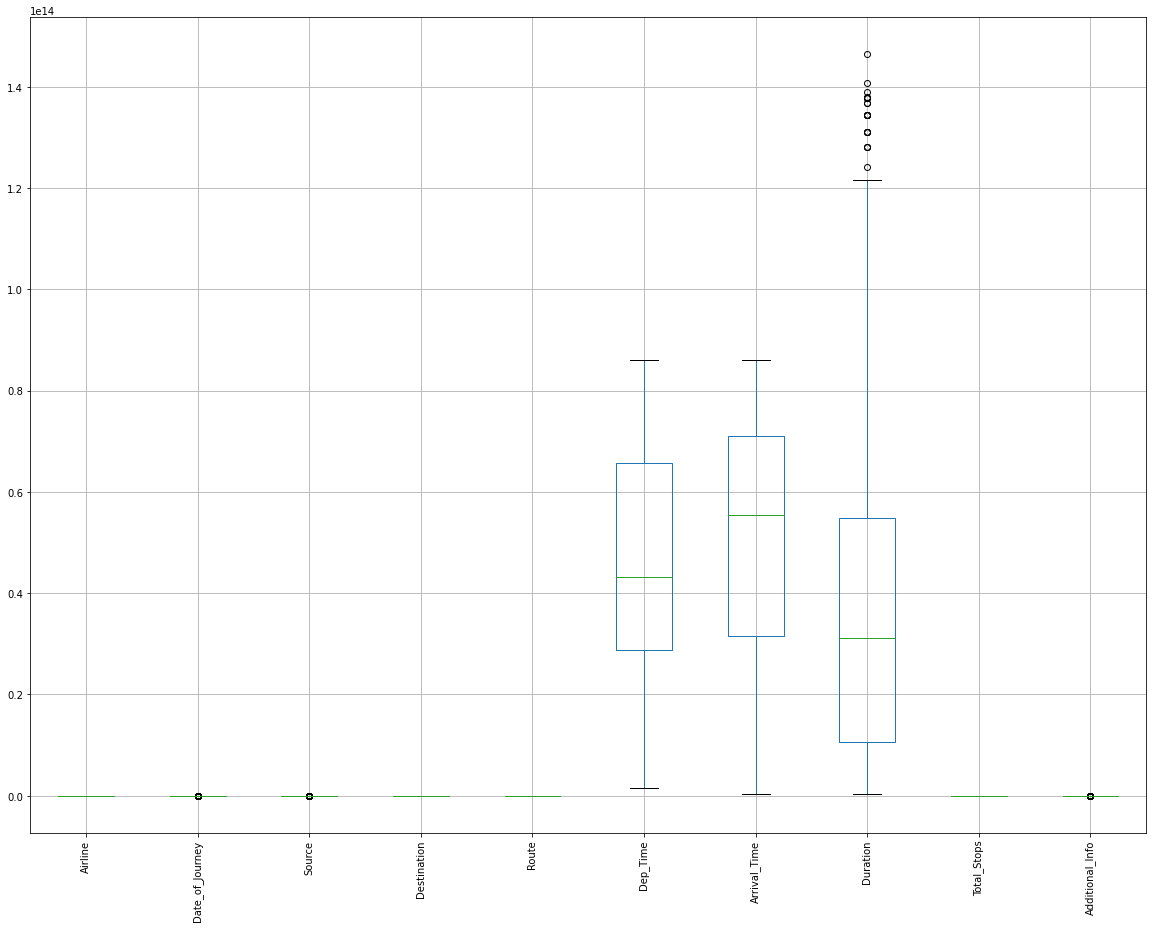

In [158]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
flight.boxplot()
plt.xticks(rotation=90)

### Using z-score

In [160]:
from scipy.stats import zscore
z= np.abs(zscore(flight))

In [161]:
threshold = 3
print(np.where(z>3))

(array([ 251,  510,  786,  954, 1022, 1271, 1279, 1379, 1511, 1554, 1686,
       1689, 1781, 1802, 1861, 1918, 1945, 2114, 2359, 2472, 2492],
      dtype=int64), array([7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7],
      dtype=int64))


In [162]:
flight = flight [(z<3).all(axis=1)]


In [163]:
print(flight.shape)


(2650, 10)


- Acceptable percentage

#### Scaling

In [164]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

flight =scale.fit_transform(flight)

##### scaled

In [165]:
import gzip, pickle
with gzip.open("flighprice.pklz", 'rb') as ifp:
    price = pickle.load(ifp)

In [166]:
price

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002246337DA30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000224638F08B0>,
                                        'n_estimators': [50, 100]})

In [167]:
prediction = price.predict(flight)

In [168]:
prediction

array([15587.37933609,  4411.2765641 , 13017.75102504, ...,
       15674.07365336, 10734.37499817, 11350.10608004])

In [170]:
import numpy as np
predicted = np.array(prediction)
df_con = pd.DataFrame({ "predicted":predicted}, index = range(len(prediction)))
df_con.head()

,predicted
0,15587.379336
1,4411.276564
2,13017.751025
3,9634.304405
4,3683.861398
